# SkyInsight: Predictive Analytics for Cost-Effective Air Travel"

by: Mark Dunlea Tate, Laundry Houston, Anthony Amadasun

---

### Introduction



---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

Read and assign data set.

In [2]:
df = pd.read_csv('../data/encoded_dataset_FINAL.csv')
df.head()

,flight,stops,class,duration,price,duration_range,departure_time_encoded,duration_range_encoded,airline_Air_India,airline_GO_FIRST,...,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_Chennai,destination_Delhi,destination_Hyderabad,destination_Kolkata,destination_Mumbai
0,SG-8709,0,0,130,71.44,Short,2,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,SG-8157,0,0,140,71.44,Short,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,I5-764,0,0,130,71.47,Short,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,UK-995,0,0,135,71.46,Short,4,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,UK-963,0,0,140,71.46,Short,4,0,0,0,...,0,0,0,1,0,0,0,0,0,1


### 3.1 Data Modeling

In [3]:
X = df.drop(columns=['flight', 'price', 'duration_range'])
y = df['price']

#### Random Forest Regressor

Train-Test Split.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

Initiate RandomForestRegressor model and fit to our training data.

In [5]:
model = RandomForestRegressor(random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

Print out train and test scores as well as RMSE.

In [6]:
print(f"Training Score: {model.score(X_train, y_train):.4f}")
print(f"Testing Score: {model.score(X_test, y_test):.4f}")

y_pred = model.predict(X_test)

print(f"RMSE Score: {np.sqrt(mean_squared_error(y_test, y_pred))}")

Training Score: 0.9793
Testing Score: 0.9753
RMSE Score: 42.78448108349067


### 3.2 Model Visualization

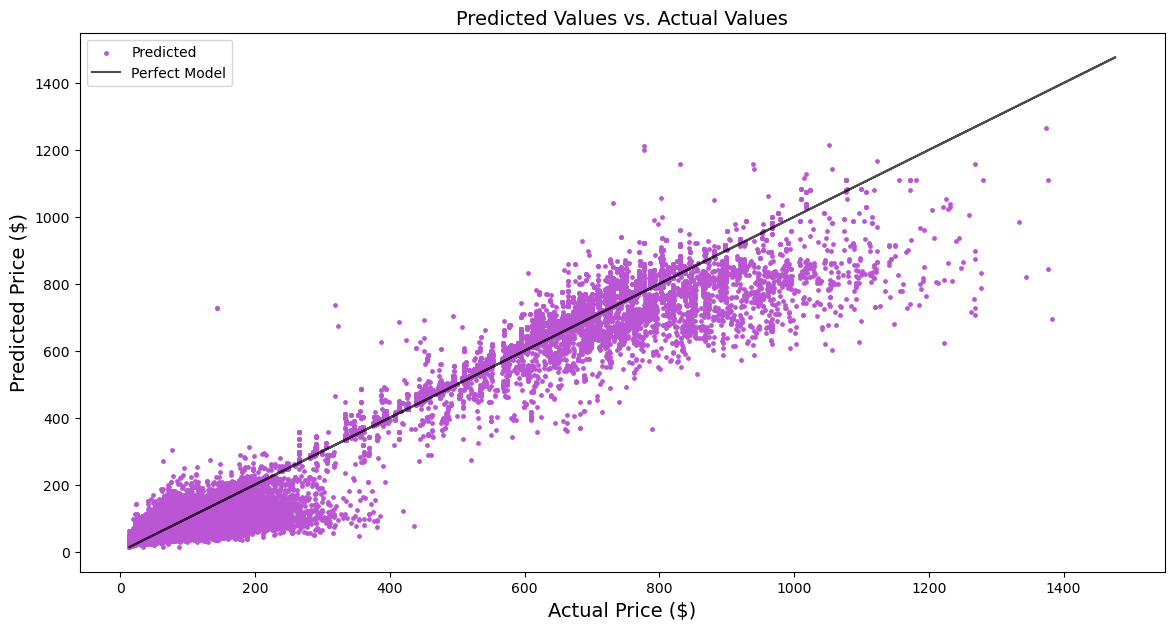

In [9]:
plt.figure(figsize=(14, 7))
plt.scatter(
    y_test,
    y_pred,
    color="MediumOrchid",
    s=6,
    label="Predicted",
)
plt.title("Predicted Values vs. Actual Values", size=14)
plt.xlabel("Actual Price ($)", size=14)
plt.ylabel("Predicted Price ($)", size=14)
plt.plot(df["price"], y, color="black", alpha=0.7, label="Perfect Model")
plt.legend(loc="upper left");

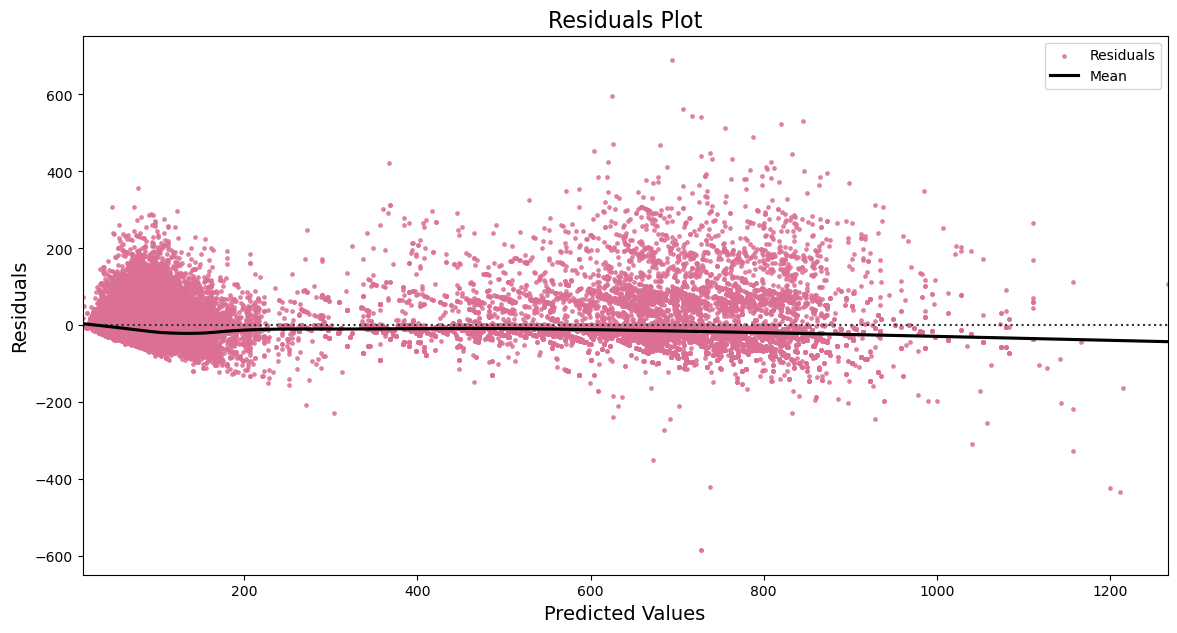

In [8]:
plt.figure(figsize=(14, 7))
sns.residplot(
    x=y_pred,
    y=y_test,
    lowess=True,
    color="PaleVioletRed",
    line_kws=dict(color="black", label="Mean"),
    label="Residuals",
    scatter_kws={"s": 6},
)
plt.title("Residuals Plot", size=16)
plt.xlabel("Predicted Values", size=14)
plt.ylabel("Residuals", size=14)
plt.legend();